In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

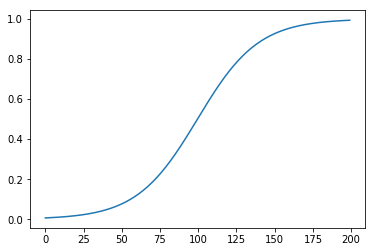

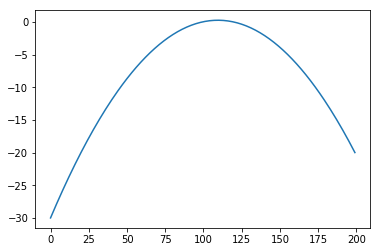

In [15]:
# シグモイド 関数
def sigmoid(x):
    z1 = 1/(1+np.exp(-x))
    z2 = x*(1-x) ##微分したシグモイド
    return z1, z2

z1_list = []
z2_list = []
x = np.linspace(-5, 5, 200)
for iter in x:
    z1, z2 = sigmoid(iter)
    z1_list.append(z1)
    z2_list.append(z2)

plt.plot(z1_list)
plt.show()
plt.close()
plt.plot(z2_list)
plt.show()
plt.close()

# get data

In [17]:
import numpy as np
def generate_two_classes(num_observations):
    # num_observations = per class
    x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
    x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

    features = np.vstack((x1, x2)).astype(np.float32)
    labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
    return features, labels

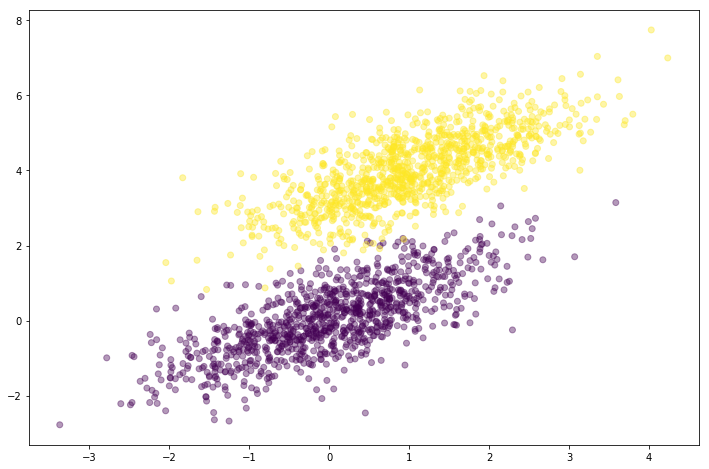

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
x, y = generate_two_classes(1000)
plt.scatter(x[:, 0], x[:, 1],c = y, alpha = .4)

# Vanilla Logistic Regression

In [3]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def ll_gradient(features, target, predictions):
    return np.dot(features.T, target - predictions)

class LogisticRegression:    
    weights = None
    
    def fit(self, features, target, num_steps, lr, add_intercept = False):
        if add_intercept:
            intercept = np.ones((features.shape[0], 1))
            features = np.hstack((intercept, features))

        weights = np.zeros(features.shape[1])

        for step in range(num_steps):
            scores = np.dot(features, weights)
            predictions = sigmoid(scores)

            gradient = ll_gradient(features, target, predictions)
            weights += lr * gradient

            # Print log-likelihood every so often
            if step % 10000 == 0:
                print(log_likelihood(features, target, weights))

        self.weights = weights
  
    def predict(self, features):
        scores = np.dot(np.hstack((np.ones((features.shape[0], 1)),
                                 features)), self.weights)
        return np.round(sigmoid(scores))

In [4]:
LogR = LogisticRegression()
LogR.fit(x, y, num_steps = 50000, lr = 5e-5, add_intercept=True)

-1198.4612097865474
-37.45795115235467
-31.429463637482836
-29.1113635425963
-27.873956680406966


In [5]:
preds = LogR.predict(x)
print('Accuracy from scratch: {0}'.format((preds == y).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.995


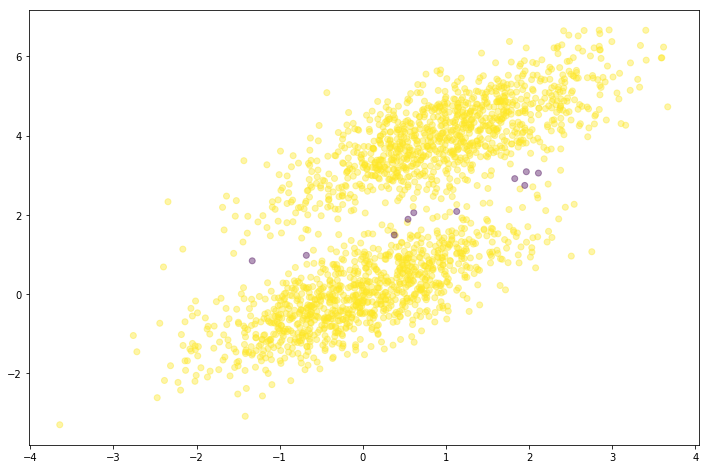

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(x[:, 0], x[:, 1],
            c = preds==y, alpha = .4)

# sklearn

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(x, y)

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [20]:
print(clf.intercept_, clf.coef_)

[-18.42294922] [[-6.41928497 10.74959564]]


In [22]:
preds = clf.predict(x)

In [23]:
print('Accuracy from sk-learn: {0}'.format(clf.score(x, y)))

Accuracy from sk-learn: 0.995


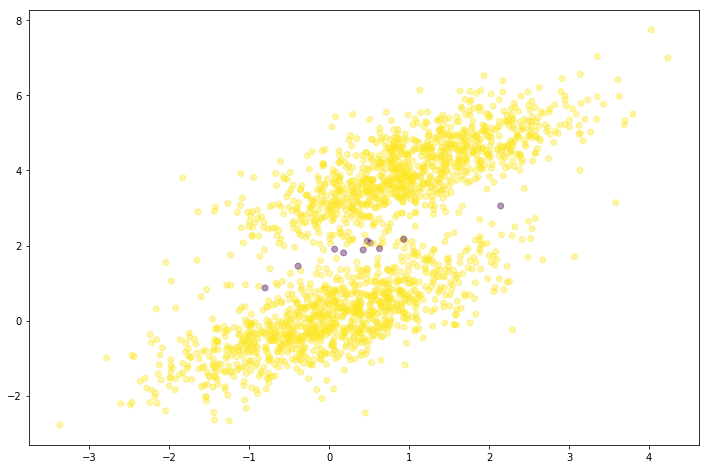

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(x[:, 0], x[:, 1],
            c = preds==y, alpha = .4)